
1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. 

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que lo muevas a esa carpeta desde el comienzo del examen.

4) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [1]:
3+2+3

8

COMENTARIOS:

1) En tu programa para Wilson no hace falta calcular los primos anteriores a $n$. Únicamente hay que decidir, usando el criterio de Wilson, si $n$ es o no primo.

En este examen los tres ejercicios están relacionados, de una forma u otra,  con el *cálculo de factoriales de enteros*. Debe sorprendernos, al menos un poco,  que sea posible calcular estos enteros enormes en tan poco tiempo, y  el tercer ejercicio empieza a indicar cómo podemos mejorar la simple multiplicación de los enteros entre $1$ y $n$.  

## Ejercicio 1 (4 puntos)

La congruencia de Wilson afirma que para todo número primo $p$ se verifica que el factorial de $p-1$ es congruente con $-1$ módulo $p$. Es interesante que el recíproco también es cierto: si un entero $n$ verifica la congruencia de Wilson entonces es primo, y por tanto la congruencia de Wilson puede servir como un criterio de primalidad.

El método más simple, pero no el más eficiente,  para determinar si un número $n$ es primo es la criba de Eratóstenes, es decir,  $n$ es primo si después de cribar la lista de enteros entre $2$ y $n$, ambos inclusive, $n$ está todavía en la lista cribada. Vimos en clase dos formas de implementar la criba, la segunda,  mucho más eficiente que la primera, se reproduce en la siguiente celda. 

**En este ejercicio debes comparar, en términos de eficiencia,  la criba con el criterio de Wilson como método para decidir si un entero $n$ es primo, es decir, debes producir  evidencia que demuestre, suficientemente, cuál de los dos métodos es mejor. No olvides discutir las consecuencias que obtienes del experimento.**

Para medir tiempos puedes usar la función de SAGE $cputime()$, y con los tiempos obtenidos debes generar gráficas que permitan **ver** la diferencia entre los métodos.

El número de enteros $n$ para los que medimos los tiempos  no puede ser muy grande, por ejemplo deberíamos conformarnos con unos $100$ enteros, pero los enteros $n$ habría que seleccionarlos, usando la función de SAGE $randint(N1,N2)$,  en rangos $[N1,N2]$ suficientemente grandes. Por ejemplo, puedes usar $[10^4,10^5]$ y también $[10^5,10^6]$. Los parámetros sugeridos son sólo una indicación, y puede ser necesario modificarlos, pero si se aumenta el rango, por ejemplo hasta $10^7$, sería conveniente disminuir el número de enteros para los que medimos los tiempos. 

**¿Qué buscamos con este experimento? Es muy posible que en cierto rango $[N1,N2]$ uno de los métodos sea sistemáticamente mejor y en otro rango lo sea el otro. Querríamos identificar aproximadamente dónde se produce, si es que se produce,  el cambio.**




In [1]:
def criba(n):
        aux = [True]*int(n)
        aux[0] = False
        aux[1] = False
        for i in xrange(2,floor(sqrt(n))+1):
            if aux[i]:
                for j in xrange(i*i,n,i):
                    aux[j] = False
        return [k for k in xrange(n) if aux[k]==True]

In [2]:
def wilson(n):
    L = []
    b = 0
    mult = 1
    for i in range(2, n):
        mult *= (i-1)
        if((mult%i) == i-1):
            L.append(i)
    return L
    

In [3]:
def dibuja_grafica(N1, N2):
    Lw = []
    Lc = []
    pl = plot([])
    for ra in range(0, 100):
        a = randint(N1, N2)
        t = cputime()
        wilson(a)
        Lw.append((a, cputime(t)))
        t1 = cputime()
        criba(a)
        Lc.append((a, cputime(t1)))
    P1 = points(Lc, color="red")
    P2 = points(Lw)
    show(P1 + P2)

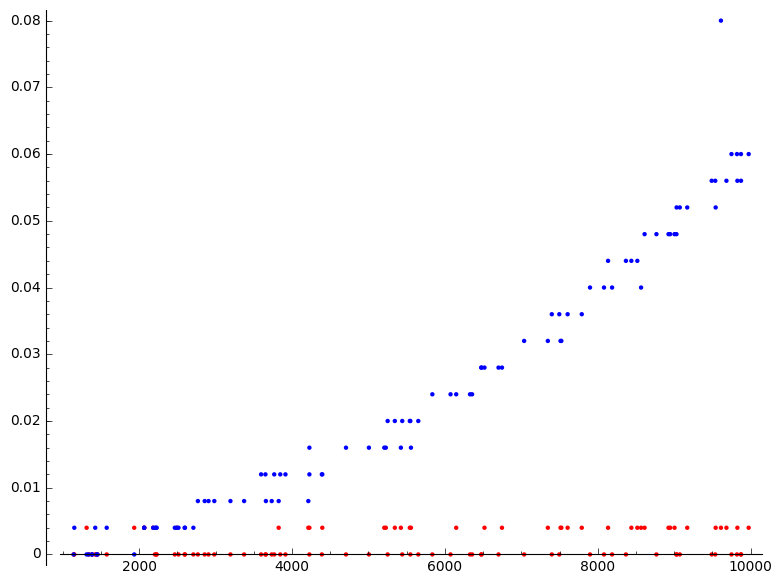

In [8]:
dibuja_grafica(1000, 10000)

Podemos apreciar que criba (en rojo) tarda menos que wl método de Wilson, aspecto que sorprende bastante ya que el método de criba es muy largo, el problema se puede deber a que en el método de Wilson (pese a estar optimizado) realizamos muchas multiplicaciones al comprobar el factorial. En la criba eliminamos muchas posibilidades por cada bucle mientras que en Wilson cada bucle elimina o añade una sola.

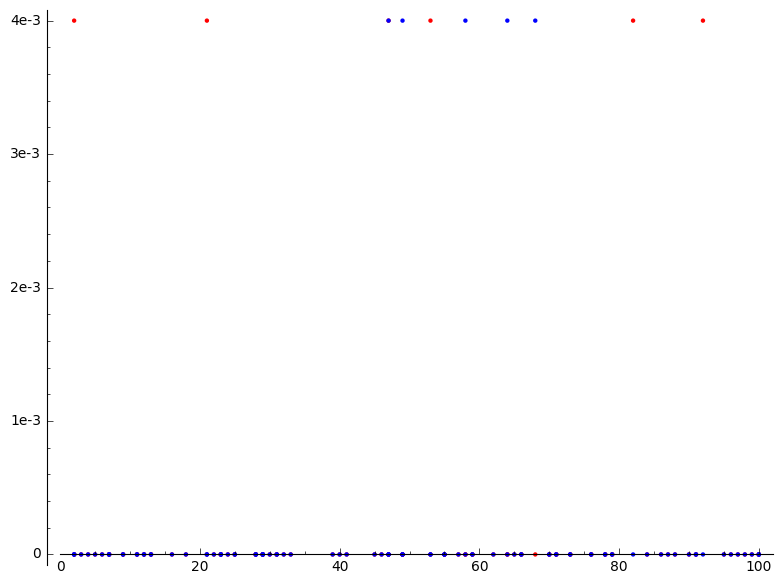

In [12]:
dibuja_grafica(2, 100)

Ahora bien, podemos observar que para números pequeños el método de Wilson es más rapido, llegando a salirse de la precisión incorporada en cputime()

## Ejercicio 2 (3 puntos)

En este ejercicio **estudiamos diversos métodos para calcular el número binomial $\binom{n}{m}$**, que,  por definición,  es el entero $$\binom{n}{m}:=\frac{n!}{m!(n-m)!},$$ y cuenta el número de subconjuntos con $m$ elementos de un conjunto de $n$ elementos. 

1) Un primer método,  que usaremos como base para nuestras comparaciones, consiste en usar la definición anterior
directamente, es decir, calculando los factoriales y realizando las operaciones indicadas. Define una función de SAGE de nombre $binomial\_1(n,m)$ y que devuelva el factorial calculado de esta manera. 

2) El cálculo anterior se puede organizar mejor: simplificamos $(n-m)!$ con parte de $n!$ y utilizamos que queda el mismo número de factores en el numerador que en el denominador para calcular el binomial más eficientemente. Define una función de SAGE de nombre $binomial\_2(n,m)$ y que devuelva el factorial calculado de esta manera. 

3) Otra manera de calcular el binomial es la base del *triángulo de Tartaglia*, es decir, las relaciones 
$$\binom{n}{0}=\binom{n}{n}=1;\binom{n}{m}=\binom{n-1}{m-1}+\binom{n-1}{m},$$
que permitirían una definición recursiva del binomial. NO se pide esta solución recursiva, que no sería nada eficiente,  sino una iterativa equivalente. Define una función de SAGE de nombre $binomial\_3(n,m)$ que utilice bucles y las relaciones anteriores para calcular el binomial. En cierto sentido este programa haría  lo mismo que cuando calculamos el triángulo de Tartaglia a mano. 

4) **Ejecuta las celdas incluidas al final de este ejercicio para comprobar que las funciones son correctas. ¿Algún comentario acerca de estos resultados?**



In [1]:
def binomial_1(n,m):
    return ((factorial(n))/(factorial(m) * factorial(n-m)))

In [2]:
def binomial_2(n,m):
    a = n-m
    fac = 1
    for i in range(a+1, n+1):
        fac *= i
    return fac/factorial(m)

In [96]:
def binomial_3(n,m):
    L = [(n,m)]
    aux = 0
    while(len(L) != 0):
        (a,b) = L.pop()
        if(b == 0 or a == b):
            aux += 1
        else:
            L.append((a-1,b-1))
            L.append((a-1, b))
        
    return aux
    

In [4]:
%time N = binomial(12456758,65293) ##Binomial de SAGE

CPU times: user 392 ms, sys: 0 ns, total: 392 ms
Wall time: 393 ms


In [5]:
%time N == binomial_1(12456758,65293)

CPU times: user 13.4 s, sys: 412 ms, total: 13.8 s
Wall time: 13.8 s


True

In [6]:
%time N == binomial_2(12456758,65293)

CPU times: user 832 ms, sys: 312 ms, total: 1.14 s
Wall time: 1.13 s


True

In [ ]:
%time N == binomial_3(12456758,65293)

## Ejercicio 3 (3 puntos)

Finalmente, estudiamos un **algoritmo para calcular factoriales** basado en el siguiente teorema:

*Dados un entero $n$ y un primo $p\le n$ el exponente de $p$ en la factorización de $n!$ en producto de primos es el entero $$exponente(p):=\sum_{i=1}^{i=\infty} floor(n/p^i).$$*

Observa que la suma es en realidad finita, ya que en cuanto $p^i$ supera a $n$ los sumandos son todos cero, y para todos los primos $p\le n$ el exponente correspondiente es al menos $1$. 

1) Define una función que reciba el entero $n$ como argumento y devuelva una lista de pares con el primer elemento de cada par uno de los primos $p\le n$  y el segundo el exponente que corresponde a $p$ de acuerdo al teorema mencionado. 
Para generar la lista de primos menores o iguales a $n$ puedes usar la función de SAGE $prime\_range$ o bien la función $criba$ del Ejercicio $1$. 

2) Define una función de nombre $factorial\_n(n)$ que en primer lugar llame a la función del apartado anterior, y luego calcule el producto de todos los primos elevado cada uno a su exponente. El resultado debe ser el factorial de $n$. Para elevar cada primo a su exponente debería usarse el algoritmo recursivo, bastante eficiente,  visto en clase. 

3) **Ejecuta las celdas al final de este ejercicio para comprobar que la función definida es correcta.**

4) **¿Se te ocurre alguna manera de mejorar la eficiencia de $factorial\_n(n)$? Explica.**


In [79]:
var('i')
def calcula_sumatorio(n, p):
    t = ceil(log(n)/log(p))+1
    return sum((floor(n/(p**i))), i, 1, t)

In [80]:
def exponente(n):
    L = []
    for p in prime_range(n+1):
        L.append((p, calcula_sumatorio(n,p)))
    return L

In [81]:
def potencia(a,k):
    if k==0:
        return 1
    elif k %2 == 0:
        b = potencia(a,k/2)
        return (b*b)
    else:
        b = potencia(a,(k-1)/2)
    return (a*b*b)

In [82]:
def factorial_n(n):
    fac = 1
    L = exponente(n)
    for i in range(0, len(L)):
        fac *= potencia(L[i][0], L[i][1])
    return fac

In [83]:
%time N1=factorial(657975) ##Factorial de SAGE

CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 115 ms


In [85]:
%time N1==factorial_n(657975)

CPU times: user 42.9 s, sys: 272 ms, total: 43.2 s
Wall time: 42.7 s


True

Podemos ver que nuestro método es bastante ineficiente, esto puede deberse a que la función exponente es bastante lenta, lo que puede deberse a la complicación de un sumatorio tan largo.
Para mejorarlo habría que mejorar en gran medida la función exponente.